In [ ]:
## Import General Libraries


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(42) 
import random 
random.seed(42)

# Intro
Question 1

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
['DESCR', 'data', 'filenames', 'target', 'target_names']
{'alt.atheism': 480, 'comp.graphics': 584, 'comp.os.ms-windows.misc': 591, 'comp.sys.ibm.pc.hardware': 590, 'comp.sys.mac.hardware': 578, 'comp.windows.x': 593, 'misc.forsale': 585, 'rec.autos': 594, 'rec.motorcycles': 598, 'rec.sport.baseball': 597, 'rec.sport.hockey': 600, 'sci.crypt': 595, 'sci.electronics': 591, 'sci.med': 594, 'sci.space': 593, 'soc.religion.christian': 599, 'talk.politics.guns': 546, 'talk.politics.mideast': 564, 'talk.politics.misc': 465, 'talk.religion.misc': 377}
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.mi

<Figure size 360x72 with 0 Axes>

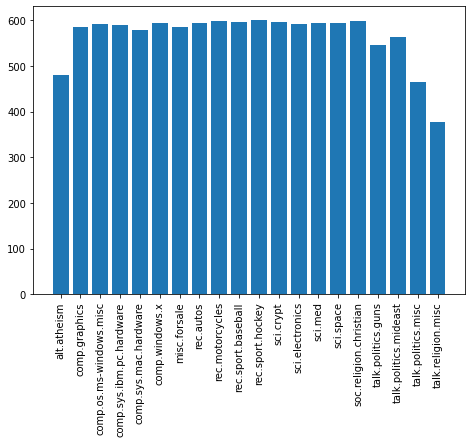

In [ ]:
from sklearn.datasets import fetch_20newsgroups


categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 
              'misc.forsale', 'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
              'sci.electronics', 'sci.med', 'sci.space', 
              'soc.religion.christian','talk.politics.guns', 'talk.politics.mideast',
              'talk.politics.misc', 'talk.religion.misc']
data = fetch_20newsgroups(categories=None)
print((data.target_names))
print(dir(data))

def counting(data, categories):
    count =0
    for x in data.filenames:
    #    print(x)
        if categories in x:
            count+=1
    return(count)
d={}
for x in categories:
    total=counting(data, x)
    d[x]=total
    
print(d)
d_x= list(d.keys())
d_y=list(d.values())
print(d_x)
print(d_y)
# df=pd.DataFrame(d)


fig = plt.figure(figsize=(5, 1))
fig, ax = plt.subplots()
ax = fig.add_axes([0,0,1,1])
ax.bar(d_x,d_y)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()






# Binary Classification

## Feature Extraction
Question 2

In [ ]:
'''
Create training and testing sets
'''
from sklearn.datasets import fetch_20newsgroups


# Categories we are interested in
comp_categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
# Create train and test data sets
twenty_train = fetch_20newsgroups(subset='train', 
                                  categories=comp_categories+rec_categories, 
                                  shuffle=True, random_state=42,)
twenty_test = fetch_20newsgroups(subset='test', 
                                 categories=comp_categories+rec_categories, 
                                 shuffle=True, random_state=42,)

In [ ]:
'''
Create stopwords
    exclude words that are too common, or too rare (words that tell us nothing
     specific about the document)
'''
import nltk
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation


# Use "english" stopwords of CountVectorizer
stop_words_en = stopwords.words('english')
stop_words_en.append('Re:')
stop_words_en.append('')
# Exclude terms that are numbers/symbols
combined_stopwords = set.union(set(stop_words_en), set(punctuation))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
'''
Lemmatization w/ Part-of-Speach 
'''
from nltk import pos_tag
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'
        
wnl = nltk.wordnet.WordNetLemmatizer()
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
'''
Count Vectorization and TF-IDF Matrices
'''
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


# overwrite analyzer with callable function:
analyzer = CountVectorizer().build_analyzer()

# performs lemmatization as function for analyzer
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

# Apply CountVectorizer to train and test sets
count_vect = CountVectorizer(min_df=3, analyzer=stem_rmv_punc, stop_words='english')
train_rc_V = count_vect.fit_transform(twenty_train.data)
print("Term-freq matrix shape train set: ", train_rc_V.shape)                   # 4732 docs, 16466 terms 
print()
test_rc_V = count_vect.transform(twenty_test.data)
print("Term-freq matrix shape test set: ", test_rc_V.shape)                     # 3150 docs, 16466 terms
print()

# get_feature_names gives us a list of words that each column of term-frequency 
# matrix corresponds to 
feat_names = count_vect.get_feature_names()
print("Number of terms: ", len((feat_names)))                                   # 16466 terms (matches above)
print(feat_names[1:10])
print()

# Compute the TF-IDF matrices of the train and test sets
tfidf_trans = TfidfTransformer()
X_train_tfidf = tfidf_trans.fit_transform(train_rc_V)
X_test_tfidf = tfidf_trans.transform(test_rc_V)
print("TF-IDF shape train set: ", X_train_tfidf.shape)
print()
print("TF-IDF shape test set: ", X_test_tfidf.shape)
print()


Term-freq matrix shape train set:  (4732, 16466)

Term-freq matrix shape test set:  (3150, 16466)

Number of terms:  16466
['0010580b', '002251w', '0096b0f0', '00bjgood', '00mbstultz', '00pm', '02uv', '03hz', '03k']

TF-IDF shape train set:  (4732, 16466)

TF-IDF shape test set:  (3150, 16466)



## Dimensionality Reduction
Question 3

In [ ]:
'''
LSI
'''
from sklearn.decomposition import TruncatedSVD


svd = TruncatedSVD(n_components=50, random_state=42)
X_train_LSI = svd.fit_transform(X_train_tfidf)
X_test_LSI = svd.fit_transform(X_test_tfidf)
print(X_train_LSI.shape)

(4732, 50)


In [ ]:
np.sum(np.array(X_train_tfidf - X_train_LSI.dot(svd.components_))**2)

5062.75424563187

In [ ]:
'''
NMF
'''
from sklearn.decomposition import NMF


model = NMF(n_components=50, init='random', random_state=42)
W_train = model.fit_transform(X_train_tfidf)
W_test = model.fit_transform(X_test_tfidf)

print(W_train.shape)

(4732, 50)


In [ ]:
H = model.components_
# H.shape

In [ ]:
np.sum(np.array(X_train_tfidf - W_train.dot(H))**2)

4143.541730848815

## Classification Algorithms
Questions 4-7

In [ ]:
from sklearn.datasets import fetch_20newsgroups

comp_categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

# Create train and test data sets
eight_train = fetch_20newsgroups(subset='train', 
                                  categories=comp_categories+rec_categories, 
                                  shuffle=True, random_state=42,)
eight_test = fetch_20newsgroups(subset='test', 
                                 categories=comp_categories+rec_categories, 
                                 shuffle=True, random_state=42,)

In [ ]:
'''
Reassign labels to binary
    comp will get label '0' and rec will get label '1'
'''


for i in np.arange(eight_train.target.shape[0]):
    if eight_train.target[i] < 4:
        eight_train.target[i] = 0
    else:
        eight_train.target[i] = 1

for i in np.arange(eight_test.target.shape[0]):
    if eight_test.target[i] < 4:
        eight_test.target[i] = 0
    else:
        eight_test.target[i] = 1

print(np.unique(eight_train.target))
print(np.unique(eight_test.target))

[0 1]
[0 1]


### SVM
Question 4

In [ ]:
'''
Linear SVM
'''



comp_categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

# Create train and test data sets

eight_train = fetch_20newsgroups(subset='train', 
                                  categories=comp_categories+rec_categories, 
                                  shuffle=True, random_state=42,)
eight_test = fetch_20newsgroups(subset='test', 
                                 categories=comp_categories+rec_categories, 
                                 shuffle=True, random_state=42,)

eight_train_LSI = X_train_LSI
eight_test_LSI = X_test_LSI

In [ ]:
'''
Reassign labels
    comp will get label '0' and rec will get label '1'
'''

for i in np.arange(X_train_tfidf.shape[0]):
    if eight_train.target[i] < 4:
        eight_train.target[i] = 0
    else:
        eight_train.target[i] = 1

for i in np.arange(X_test_tfidf.shape[0]):
    if eight_test.target[i] < 4:
        eight_test.target[i] = 0
    else:
        eight_test.target[i] = 1

print(np.unique(eight_train.target))
print(np.unique(eight_test.target))

[0 1]
[0 1]


In [ ]:
'''
Train Linear SVM w/ C = 1000, C = 0.0001
'''
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

predicted_SVM_1000 = SVC(kernel='linear', C = 1000).fit(X_train_LSI, eight_train.target).predict(X_test_LSI)
acc1000 = accuracy_score(eight_test.target, predicted_SVM_1000)
print('Accuracy w/ C = 1000 = ')
print(acc1000)

predicted_SVM_0001 = SVC(kernel='linear', C = 0.0001).fit(X_train_LSI, eight_train.target).predict(X_test_LSI)
acc0001 = accuracy_score(eight_test.target, predicted_SVM_0001)
print('Accuracy w/ C = 0.0001 = ')
print(acc0001)

Accuracy w/ C = 1000 = 
0.7596825396825397
Accuracy w/ C = 0.0001 = 
0.5047619047619047


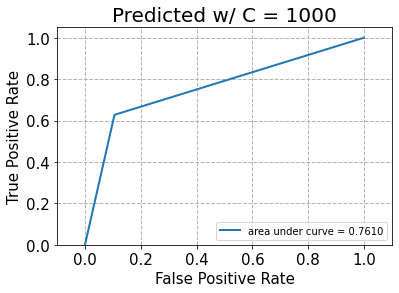

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(eight_test.target, predicted_SVM_1000)
roc_auc = auc(fpr,tpr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

ax.grid(color='0.7', linestyle='--', linewidth=1)
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=15)
ax.legend(loc="lower right")
ax.set_title('Predicted w/ C = 1000',fontsize=20)
for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)

plt.show()

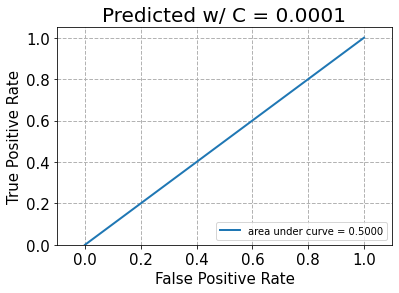

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(eight_test.target, predicted_SVM_0001)
roc_auc = auc(fpr,tpr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

ax.grid(color='0.7', linestyle='--', linewidth=1)
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=15)
ax.legend(loc="lower right")
ax.set_title('Predicted w/ C = 0.0001',fontsize=20)
for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)

plt.show()

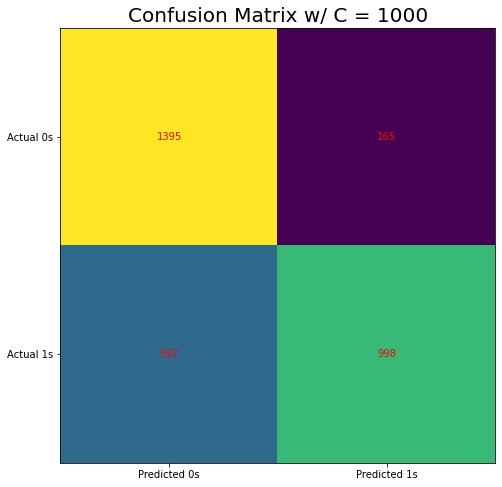

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(eight_test.target, predicted_SVM_1000)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
ax.set_title('Confusion Matrix w/ C = 1000',fontsize=20)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

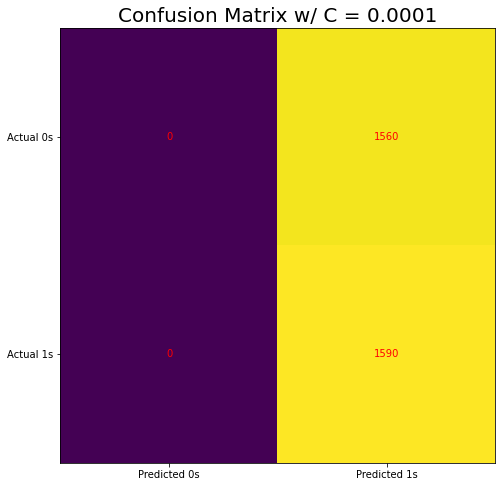

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(eight_test.target, predicted_SVM_0001)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
ax.set_title('Confusion Matrix w/ C = 0.0001',fontsize=20)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Performance Metrics of C = 1000 SVM")
print(classification_report(eight_test.target, predicted_SVM_1000))
print()

print("Performance Metrics of C = 0.0001 SVM")
print(classification_report(eight_test.target, predicted_SVM_0001))
print()

Performance Metrics of C = 1000 SVM
              precision    recall  f1-score   support

           0       0.70      0.89      0.79      1560
           1       0.86      0.63      0.73      1590

    accuracy                           0.76      3150
   macro avg       0.78      0.76      0.76      3150
weighted avg       0.78      0.76      0.76      3150


Performance Metrics of C = 0.0001 SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1560
           1       0.50      1.00      0.67      1590

    accuracy                           0.50      3150
   macro avg       0.25      0.50      0.34      3150
weighted avg       0.25      0.50      0.34      3150




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score

regularizers = [10e-3, 0.01, 0.1, 1, 10, 100, 10e3]
folds = 5
scores = []

for reg in regularizers:

    pred = SVC(kernel='linear', C = reg)
    score = cross_val_score(pred, X_train_LSI, eight_train.target, cv=folds)
    scores.append(score.mean())
print("Scores: ", scores)
best = scores.index(max(scores))
print("Best: ", best)

Scores:  [0.5052829565267865, 0.5052829565267865, 0.9678767488742686, 0.975484393801724, 0.9775985587065865, 0.9763316225043589, 0.9759076732800365]
Best:  4


Best:  10


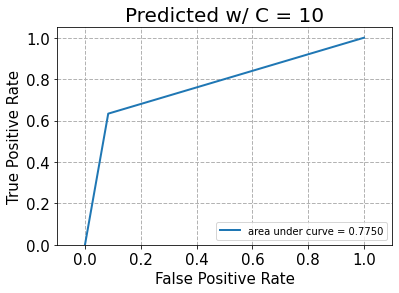

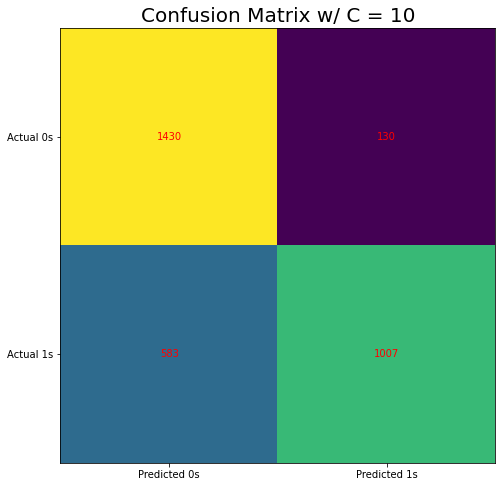

Performance Metrics of C = 10 SVM
              precision    recall  f1-score   support

           0       0.71      0.92      0.80      1560
           1       0.89      0.63      0.74      1590

    accuracy                           0.77      3150
   macro avg       0.80      0.77      0.77      3150
weighted avg       0.80      0.77      0.77      3150




In [ ]:
bestreg = regularizers[best]
print("Best: ", bestreg)

predicted_SVM_best = SVC(kernel='linear', C = bestreg).fit(X_train_LSI, eight_train.target).predict(X_test_LSI)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(eight_test.target, predicted_SVM_best)
roc_auc = auc(fpr,tpr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

ax.grid(color='0.7', linestyle='--', linewidth=1)
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=15)
ax.legend(loc="lower right")
ax.set_title('Predicted w/ C = 10',fontsize=20)
for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)

plt.show()
# Confusion matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(eight_test.target, predicted_SVM_best)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
ax.set_title('Confusion Matrix w/ C = 10',fontsize=20)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Performance Metrics of C = 10 SVM")
print(classification_report(eight_test.target, predicted_SVM_best))
print()

### Logistic Regression
Question 5

In [ ]:
'''
Train Logistic Regreesion w/out Regularizaion
'''
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression(penalty='none', random_state=0, max_iter=500)
# train
logistic_model.fit(X_train_LSI, eight_train.target)
# test
preds = logistic_model.predict(X_test_LSI)

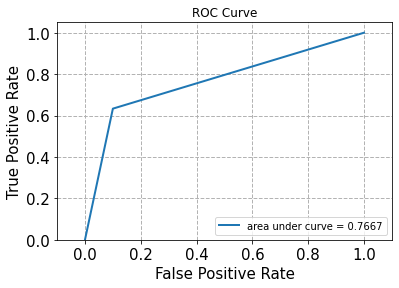

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(eight_test.target, preds)
roc_auc = auc(fpr,tpr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

ax.grid(color='0.7', linestyle='--', linewidth=1)
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=15)
ax.set_title('ROC Curve')
ax.legend(loc="lower right")

for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)

plt.show()

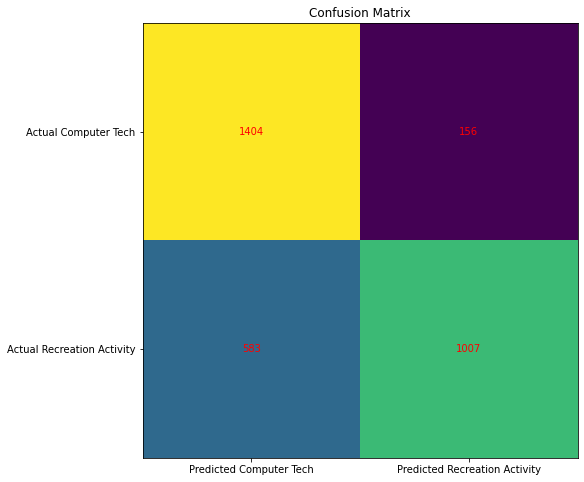

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(eight_test.target, preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Computer Tech', 'Predicted Recreation Activity'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Computer Tech', 'Actual Recreation Activity'))
ax.set_title('Confusion Matrix')
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
 # Accuracy, precision, recall, and F-1 score
from sklearn.metrics import classification_report


print(classification_report(eight_test.target, preds))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1560
           1       0.87      0.63      0.73      1590

    accuracy                           0.77      3150
   macro avg       0.79      0.77      0.76      3150
weighted avg       0.79      0.77      0.76      3150



In [ ]:
'''
Logistic Regression w/ Regularization
'''
from sklearn.model_selection import cross_val_score


folds = 5
regularizers = [10e-3, 0.01, 0.1, 1, 10, 100, 10e3]
L1_scores = []
L2_scores = []
for reg in regularizers:
  l1_model = LogisticRegression(penalty='l1', random_state=0, C=1/reg, solver='liblinear')
  l2_model = LogisticRegression(penalty='l2', random_state=0, C=1/reg, solver='liblinear')
  # cross-validation
  l1_score = cross_val_score(l1_model, X_train_LSI, eight_train.target, cv=folds)
  L1_scores.append(l1_score.mean())
  l2_score = cross_val_score(l2_model, X_train_LSI, eight_train.target, cv=folds)
  L2_scores.append(l2_score.mean())

print("scores L2 reg: ", L2_scores)
print("scores L1 reg: ", L1_scores)
print()

# determind best regularization strength
best_l2 = L2_scores.index(max(L2_scores))
l2_reg = regularizers[best_l2]
best_l1 = L1_scores.index(max(L1_scores))
l1_reg = regularizers[best_l1]
print("best l2: ", l2_reg)
print("best l1: ", l1_reg)

scores L2 reg:  [0.9784435549225214, 0.9784435549225214, 0.9765414762541551, 0.9735823151333577, 0.9704130770140937, 0.9507607198430115, 0.530854082436804]
scores L1 reg:  [0.9780216149362289, 0.9780216149362289, 0.9775990052039265, 0.9693568875563423, 0.961749242628887, 0.8998307775081431, 0.495139429956846]

best l2:  0.01
best l1:  0.01


In [ ]:
# Test logistic regression w/ optimized regularization


# test L1
optim_l1_model = LogisticRegression(penalty='l1', random_state=0, C=1/l1_reg, solver='liblinear')
optim_l1_model.fit(X_train_LSI, eight_train.target)
preds_l1 = optim_l1_model.predict(X_test_LSI)
print("Performance Metrics of L1 Regularized")
print(classification_report(eight_test.target, preds_l1))
print()

# test l2
optim_l2_model = LogisticRegression(penalty='l2', random_state=0, C=1/l2_reg, solver='liblinear')
optim_l2_model.fit(X_train_LSI, eight_train.target)
preds_l2 = optim_l2_model.predict(X_test_LSI)
print("Performance Metrics of L2 Regularized")
print(classification_report(eight_test.target, preds_l2))
print()

# test no reg
print("Performance Metrics of Logistic Regression w/out Regularization")
print(classification_report(eight_test.target, preds))

Performance Metrics of L1 Regularized
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1560
           1       0.87      0.64      0.73      1590

    accuracy                           0.77      3150
   macro avg       0.79      0.77      0.76      3150
weighted avg       0.79      0.77      0.76      3150


Performance Metrics of L2 Regularized
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      1560
           1       0.88      0.64      0.74      1590

    accuracy                           0.77      3150
   macro avg       0.79      0.78      0.77      3150
weighted avg       0.80      0.77      0.77      3150


Performance Metrics of Logistic Regression w/out Regularization
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1560
           1       0.87      0.63      0.73      1590

    accuracy                           0

### Naiive Bayes
Question 6

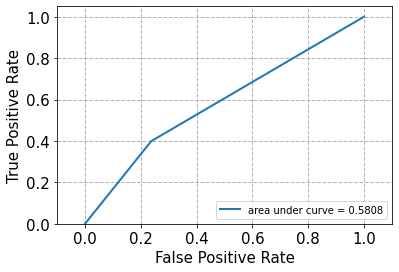

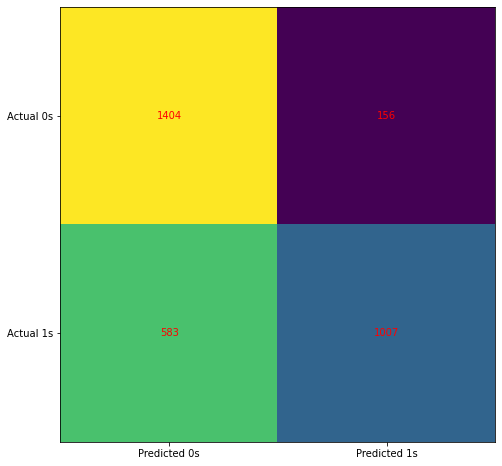

              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1560
           1       0.63      0.40      0.49      1590

    accuracy                           0.58      3150
   macro avg       0.59      0.58      0.57      3150
weighted avg       0.59      0.58      0.56      3150



In [ ]:
## We use Naive Bayes classifier as an example
from sklearn.naive_bayes import GaussianNB   #initalized the Gaussian NB classifer
clf = GaussianNB()
clf = clf.fit(X_train_LSI, eight_train.target)
GNB_predicted = clf.predict(X_test_LSI)


###plot the roc
fpr, tpr, thresholds = roc_curve(eight_test.target, GNB_predicted)
roc_auc = auc(fpr,tpr)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

ax.grid(color='0.7', linestyle='--', linewidth=1)
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=15)
ax.legend(loc="lower right")

for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)

plt.show()

##report the confusion matrix

# Confusion matrix
from sklearn.metrics import confusion_matrix


CM = confusion_matrix(eight_test.target, GNB_predicted)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(CM)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

###accuracy, recall, and precision

from sklearn.metrics import classification_report


print(classification_report(eight_test.target, GNB_predicted))

### Grid Search Of Parameters
Question 7

In [ ]:
'''
All parameters but no lemmatization
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)



N_FEATURES_OPTIONS = [50]
C_OPTIONS = [10]
REG_OPTIONS = ['l1', 'l2']
min_dfs = [3,5]
remove = ['none', ('headers', 'footer')]  # loading data options

for rem in remove:  
    eight_train = fetch_20newsgroups(subset='train', 
                                         categories=comp_categories+rec_categories, 
                                         shuffle=True, random_state=42, remove=rem)
    eight_test = fetch_20newsgroups(subset='test',
                                       categories=comp_categories+rec_categories, 
                                       shuffle=True, random_state=42, remove=rem)


    pipeline = Pipeline([
        ('vect', CountVectorizer(stop_words='english')),
        ('tfidf', TfidfTransformer()),
        ('reduce_dim', TruncatedSVD(random_state=42)),
        ('clf', GaussianNB()),
    ],
    memory=memory
    )


    param_grid = [
        {
        'vect__min_df': min_dfs,
        'reduce_dim': [TruncatedSVD(), NMF()], # 2 choices
        'reduce_dim__n_components': N_FEATURES_OPTIONS, # 2 choices
        'clf': [LinearSVC()], # 1 choice
        'clf__C': C_OPTIONS # 3 choices
        },
        {
        'vect__min_df': min_dfs,
        'reduce_dim': [TruncatedSVD(), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [GaussianNB()],
        },
        {
        'vect__min_df': min_dfs,
        'reduce_dim': [TruncatedSVD(), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [LogisticRegression(C=100, solver='liblinear')],
        'clf__penalty':REG_OPTIONS,
        }
        ]

    grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
    grid.fit(eight_train.data, eight_train.target)

    results_df = pd.DataFrame.from_dict(grid.cv_results_)
    if rem is not 'none':
        results_df.to_csv('drive/My Drive/remove_hf_lem_false.csv')
    else:
        results_df.to_csv('drive/My Drive/remove_none_lem_false.csv')
    print(results_df)

    rmtree(cachedir)

In [ ]:
'''
Lemmatization w/ Part-of-Speach 
'''

import nltk
from nltk import pos_tag
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'
        
wnl = nltk.wordnet.WordNetLemmatizer()
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

In [ ]:
'''
All and w/ lemmatization
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

# overwrite COuntVect analyzer with callable function:
analyzer = CountVectorizer().build_analyzer()
# performs lemmatization as function for analyzer
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)))



N_FEATURES_OPTIONS = [50]
C_OPTIONS = [10]
REG_OPTIONS = ['l1', 'l2']
min_dfs = [3,5]
remove = ['none', ('headers', 'footer')]  # loading data options

for rem in remove:  
    eight_train = fetch_20newsgroups(subset='train', 
                                         categories=comp_categories+rec_categories, 
                                         shuffle=True, random_state=42, remove=rem)
    eight_test = fetch_20newsgroups(subset='test',
                                       categories=comp_categories+rec_categories, 
                                       shuffle=True, random_state=42, remove=rem)
    
    for min_df in min_dfs:
        count_vect = CountVectorizer(min_df=min_df, analyzer=stem_rmv_punc, stop_words='english')
        X_train_counts = count_vect.fit_transform(eight_train.data)


        pipeline = Pipeline([
            ('tfidf', TfidfTransformer()),
            ('reduce_dim', TruncatedSVD(random_state=42)),
            ('clf', GaussianNB()),
        ],
        memory=memory
        )

        param_grid = [
            {
            'reduce_dim': [TruncatedSVD(), NMF()], # 2 choices
            'reduce_dim__n_components': N_FEATURES_OPTIONS, # 2 choices
            'clf': [LinearSVC()], # 1 choice
            'clf__C': C_OPTIONS # 3 choices
            },
            {
            'reduce_dim': [TruncatedSVD(), NMF()],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'clf': [GaussianNB()],
            },
            {
            'reduce_dim': [TruncatedSVD(), NMF()],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'clf': [LogisticRegression(C=100, solver='liblinear')],
            'clf__penalty':REG_OPTIONS,
            }
            ]

        grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
        grid.fit(X_train_counts, eight_train.target)

        results_df = pd.DataFrame.from_dict(grid.cv_results_)
        if rem is not 'none':
            results_df.to_csv('drive/My Drive/df_'+str(min_df)+'remove_hf_lem_true.csv')
        else:
            results_df.to_csv('drive/My Drive/df_'+str(min_df)+'remove_none_lem_true.csv')
        print(results_df)

        rmtree(cachedir)

# Multiclass Classification
Question 12


In [ ]:
four_cat  = ('comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'misc.forsale', 'soc.religion.christian')
four_train = fetch_20newsgroups(subset='train', 
                                  categories=four_cat, 
                                  shuffle=True, random_state=42,)
four_test = fetch_20newsgroups(subset='test', 
                                 categories=four_cat, 
                                 shuffle=True, random_state=42,)

analyzer = CountVectorizer().build_analyzer()

# performs lemmatization as function for analyzer
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

# Apply CountVectorizer to train and test sets
count_vect = CountVectorizer(min_df=3, analyzer=stem_rmv_punc, stop_words='english')
four_train_rc_V = count_vect.fit_transform(four_train.data)


# get_feature_names gives us a list of words that each column of term-frequency 
# matrix corresponds to 
feat_names = count_vect.get_feature_names()
print("Number of terms: ", len((feat_names)))                                   # 16466 terms (matches above)
print(feat_names[1:10])
print()

# Compute the TF-IDF matrices of the train and test sets
tfidf_trans = TfidfTransformer()
four_train_tfidf = tfidf_trans.fit_transform(four_train_rc_V)
four_test_tfidf = tfidf_trans.transform(four_test_rc_V)
print("TF-IDF shape train set: ", four_train_tfidf.shape)
print()
print("TF-IDF shape test set: ", four_test_tfidf.shape)
print()


#print(four_train.target)
#print(four_test.shape)

Term-freq matrix shape train set:  (2352, 8567)

Term-freq matrix shape test set:  (1565, 8567)

Number of terms:  8567
['0a', '0b', '101e', '1024x768', '1024x768x16', '1024x768x256', '1024x768x65536', '105mb', '10base']

TF-IDF shape train set:  (2352, 8567)

TF-IDF shape test set:  (1565, 8567)



In [ ]:
predicted_SVM_four_clf = SVC(kernel='linear', C = 1000).fit(four_train_tfidf, four_train.target)
predicted_SVM_four = predicted_SVM_four_clf.predict(four_test_tfidf)

acc = accuracy_score(four_test.target, predicted_SVM_four)
print('Accuracy = ')
print(acc)

Accuracy = 
0.888817891373802


In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

clf = OneVsOneClassifier(SVC(kernel = 'linear', C = 1000, random_state=42)).fit(four_train_tfidf, four_train.target)
preds = clf.predict(four_test_tfidf)
acc = accuracy_score(four_test.target, preds)
print('Accuracy = ')
print(acc)

Accuracy = 
0.8900958466453675


Performance Metrics of One vs One Multiclass SVM
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       392
           1       0.86      0.86      0.86       385
           2       0.88      0.88      0.88       390
           3       1.00      0.97      0.98       398

    accuracy                           0.89      1565
   macro avg       0.89      0.89      0.89      1565
weighted avg       0.89      0.89      0.89      1565




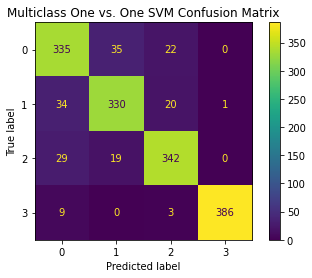

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(four_test.target, preds)
disp = plot_confusion_matrix(clf, four_test_tfidf, four_test.target, values_format = 'd') 
disp.ax_.set_title('Multiclass One vs. One SVM Confusion Matrix')
from sklearn.metrics import classification_report

print("Performance Metrics of One vs One Multiclass SVM")
print(classification_report(four_test.target, clf.predict(four_test_tfidf)))
print()


Performance Metrics of One vs. All Multiclass SVM
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       392
           1       0.87      0.85      0.86       385
           2       0.89      0.87      0.88       390
           3       1.00      0.97      0.98       398

    accuracy                           0.89      1565
   macro avg       0.89      0.89      0.89      1565
weighted avg       0.89      0.89      0.89      1565




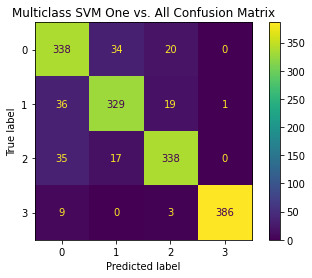

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(four_test.target, predicted_SVM_four)
disp = plot_confusion_matrix(predicted_SVM_four_clf, four_test_tfidf, four_test.target, values_format = 'd') 
disp.ax_.set_title('Multiclass SVM One vs. All Confusion Matrix')
from sklearn.metrics import classification_report

print("Performance Metrics of One vs. All Multiclass SVM")
print(classification_report(four_test.target, predicted_SVM_four_clf.predict(four_test_tfidf)))
print()


In [ ]:
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression(penalty='none', random_state=0, max_iter=500)
# train
logistic_model.fit(four_train_tfidf, four_train.target)
# test
preds = logistic_model.predict(four_test_tfidf)


acc = accuracy_score(four_test.target, preds)
print('Accuracy = ')
print(acc)



Accuracy = 
0.8952076677316294


Performance Metrics of Multiclass Naive Bayes
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       392
           1       0.85      0.90      0.87       385
           2       0.89      0.88      0.89       390
           3       0.99      0.97      0.98       398

    accuracy                           0.90      1565
   macro avg       0.90      0.89      0.90      1565
weighted avg       0.90      0.90      0.90      1565




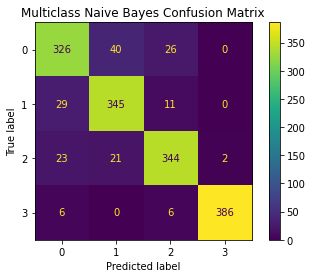

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(four_test.target, preds)
disp = plot_confusion_matrix(logistic_model, four_test_tfidf, four_test.target, values_format = 'd') 
disp.ax_.set_title('Multiclass Naive Bayes Confusion Matrix')
from sklearn.metrics import classification_report

print("Performance Metrics of Multiclass Naive Bayes")
print(classification_report(four_test.target, preds))
print()

# GLOVE


In [ ]:
from google.colab import files
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
#!ls '/content/drive/My Drive/'
embeddings_dict = {}
dimension_of_glove = 300
with open('/content/drive/My Drive/glove.6B.300d.txt', 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32") 
    embeddings_dict[word] = vector


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import fetch_20newsgroups

comp_categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

# Create train and test data sets
eight_train = fetch_20newsgroups(subset='train', 
                                  categories=comp_categories+rec_categories, 
                                  shuffle=True, random_state=42,)
eight_test = fetch_20newsgroups(subset='test', 
                                 categories=comp_categories+rec_categories, 
                                 shuffle=True, random_state=42,)

In [ ]:
'''
Reassign labels to binary
    comp will get label '0' and rec will get label '1'
'''


for i in np.arange(eight_train.target.shape[0]):
    if eight_train.target[i] < 4:
        eight_train.target[i] = 0
    else:
        eight_train.target[i] = 1

for i in np.arange(eight_test.target.shape[0]):
    if eight_test.target[i] < 4:
        eight_test.target[i] = 0
    else:
        eight_test.target[i] = 1

print(np.unique(eight_train.target))
print(np.unique(eight_test.target))

[0 1]
[0 1]


In [ ]:
import re

'''the goal of the function below is to pass a single document of form ('twenty_train.data[x]') and parse through it loooking for the 
'Subject' and 'Keywords' text 

The return variable from this list is a one-dimensional list of those words. Each entry into the list is a single word

'''


def per_document_keyword_parsing(doc):  
  mystring = doc
  list_of_Sub_Keyword = [ ]
  d= [ ]
  final=[]
  one_l= []
  m = re.search('(?<=\Subject:)(.)+',mystring)
  list_of_Sub_Keyword.append(m.group(0))
  if 'Keywords:' in mystring:
    m1 = re.search('(?<=Keywords:)(.)+',mystring)
    if m1.group(0) is not None:
        list_of_Sub_Keyword.append((m1.group(0)))

  for x in list_of_Sub_Keyword:
      d.append(x.split(' '))
  for x in d: 
      if x not in one_l: 
        for x_x in x:
          one_l.append(x_x)
  for x in one_l: 
      if x not in final: 
        final.append(x)
  lists = [list_of_Sub_Keyword, d, one_l]
  for x in lists:
    x = None
 
  
  for i in combined_stopwords:
    if i in final:
        final.remove(i)
  final_L = []
  for i in final:
    tag = pos_tag(i)
    temp = wnl.lemmatize(i.lower(), pos=penn2morphy(tag))
    final_L.append(temp)
    
  '''print(final)
  print(final_L)'''
  
  return final_L





#I am sending every single word extracted from a single document to glove and will create a vector of all the glove per that document 


'''The below will put all the glove entries per document into one glove_vector per docuemnt'''
def glove_component(send_to_glove_embedding):
  final_glove_results_per_document = []
  for x in range(0,(len(send_to_glove_embedding))):
    flag = 0
    for word in send_to_glove_embedding[x]:
      try:
        var = embeddings_dict[word]
        #print(word) 
        final_glove_results_per_document.append(var)
        flag = 1

      except KeyError:
        #print('Not recognized {}'.format(word)) 
        pass
    if flag == 0:
       final_glove_results_per_document.append(np.random.uniform(-1,1,dimension_of_glove))
       #print('No recognized words')

  ''' the below portion of the code does the division and normalizing'''


  final_glove_np=np.zeros(dimension_of_glove,)


  for x in final_glove_results_per_document:
    final_glove_np += x
    words_recognized = len(final_glove_results_per_document)
    #print(words_recognized)
    average_final = final_glove_np/words_recognized  #divided by number of words recognized
    final= average_final/np.max(average_final)      # divided by maximum value in the array
    send_to_glove_embedding = None
    
      
    #print(final)
    return (final)



''' Allows me to choose the document to send and extract from'''

def initiate_process(doc_num):
    send_to_glove_embedding = []
    doc=eight_train.data[doc_num]
    document_info=per_document_keyword_parsing(doc)
    send_to_glove_embedding.append(document_info) 
    x = glove_component(send_to_glove_embedding)
    return x


def number_of_documents_to_extract_from(num):
  for x in range(0, num):
    #print(x)
    results = initiate_process(x)
    to_classifer.append(results)


to_classifer =[]

number_of_documents_to_extract_from(len(eight_train.data)) #will extract form 4 documents 
to_classifer= np.array(np.array([ y for y in to_classifer if y is not None])) 
## to_classifer this is a np array where each entry is ideally a 300 entry. Ideally since for a document there can be the case where no words were recognizez 

length_of_to_classifer = len(to_classifer)
print(to_classifer.shape)
#print(to_classifer[0])
#print(eight_train)

(4732, 300)


In [ ]:
data = eight_train.target
print(data.shape)
print(eight_train.target)

(4732,)
[1 1 1 ... 1 1 0]


In [ ]:
import re

'''the goal of the function below is to pass a single document of form ('twenty_train.data[x]') and parse through it loooking for the 
'Subject' and 'Keywords' text 

The return variable from this list is a one-dimensional list of those words. Each entry into the list is a single word

'''


def per_document_keyword_parsing(doc):  
  mystring = doc
  list_of_Sub_Keyword = [ ]
  d= [ ]
  final=[]
  one_l= []
  m = re.search('(?<=\Subject:)(.)+',mystring)
  list_of_Sub_Keyword.append(m.group(0))
  if 'Keywords:' in mystring:
    m1 = re.search('(?<=Keywords:)(.)+',mystring)
    if m1.group(0) is not None:
        list_of_Sub_Keyword.append((m1.group(0)))

  for x in list_of_Sub_Keyword:
      d.append(x.split(' '))
  for x in d: 
      if x not in one_l: 
        for x_x in x:
          one_l.append(x_x)
  for x in one_l: 
      if x not in final: 
        final.append(x)
  lists = [list_of_Sub_Keyword, d, one_l]
  for x in lists:
    x = None
 
  
  for i in combined_stopwords:
    if i in final:
        final.remove(i)
  final_L = []
  for i in final:
    tag = pos_tag(i)
    temp = wnl.lemmatize(i.lower(), pos=penn2morphy(tag))
    final_L.append(temp)
    
  '''print(final)
  print(final_L)'''
  
  return final_L





#I am sending every single word extracted from a single document to glove and will create a vector of all the glove per that document 


'''The below will put all the glove entries per document into one glove_vector per docuemnt'''
def glove_component(send_to_glove_embedding):
  final_glove_results_per_document = []
  for x in range(0,(len(send_to_glove_embedding))):
    flag = 0
    for word in send_to_glove_embedding[x]:
      try:
        var = embeddings_dict[word]
        #print(word) 
        final_glove_results_per_document.append(var)
        flag = 1

      except KeyError:
        #print('Not recognized {}'.format(word)) 
        pass
    if flag == 0:
       final_glove_results_per_document.append(np.random.uniform(-1,1,dimension_of_glove))
       #print('No recognized words')

  ''' the below portion of the code does the division and normalizing'''


  final_glove_np=np.zeros((dimension_of_glove,))


  for x in final_glove_results_per_document:
    final_glove_np += x
    words_recognized = len(final_glove_results_per_document)
    #print(words_recognized)
    average_final = final_glove_np/words_recognized  #divided by number of words recognized
    final= average_final/np.max(average_final)      # divided by maximum value in the array
    send_to_glove_embedding = None
    
      
    #print(final)
    return (final)



''' Allows me to choose the document to send and extract from'''

def initiate_process(doc_num):
    send_to_glove_embedding = []
    doc=eight_test.data[doc_num]
    document_info=per_document_keyword_parsing(doc)
    send_to_glove_embedding.append(document_info) 
    x = glove_component(send_to_glove_embedding)
    return x


def number_of_documents_to_extract_from(num):
  for x in range(0, num):
    #print(x)
    results = initiate_process(x)
    to_classifer_test.append(results)


to_classifer_test =[]

number_of_documents_to_extract_from(len(eight_test.data)) #will extract form 4 documents 
to_classifer_test = np.array(np.array([ y for y in to_classifer_test if y is not None])) 
## to_classifer this is a np array where each entry is ideally a 300 entry. Ideally since for a document there can be the case where no words were recognizez 

length_of_to_classifer = len(to_classifer_test)
print(to_classifer_test.shape)
#print(to_classifer[0])

(3150, 300)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression(penalty='none', random_state=0, max_iter=500)
# train
logistic_model.fit(to_classifer, eight_train.target)
# test
preds = logistic_model.predict(to_classifer_test)

#acc = [] 
'''
Run this only on first initialization and then comment out as we run the code again for different dimensions for the glove vector
'''
acc.append(accuracy_score(eight_test.target, preds))
print('Accuracy = ')
print(acc)


NameError: ignored

In [ ]:
glove_dim = [50, 100, 200, 300]
perc = [x * 100 for x in acc]
#print(perc)
plt.plot(glove_dim, perc)
#plt.axis([0, 300, 50, 100])
plt.xlabel('Glove Dimension')
plt.ylabel('Accuracy Percentage')
plt.show()

NameError: ignored

In [ ]:
import umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

reducer = umap.UMAP()
embedding = reducer.fit_transform(to_classifer)
print(embedding.shape)


plt.scatter(embedding[:, 0], embedding[:, 1], c=eight_train.target, cmap='Spectral', s=5)



3150
4732


In [ ]:
random_glove = []
for i in range(0,len(eight_train.data)):
    random_glove.append(np.random.uniform(-1,1,300))
reducer = umap.UMAP()
embedding = reducer.fit_transform(random_glove)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=eight_train.target, cmap='Spectral', s=5)